<a href="https://colab.research.google.com/github/garvit30/Pandas-Tricks/blob/main/Linear_Regression_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  #To read Data
import numpy as np
import matplotlib.pyplot as plt  #For plotting the Graph
import seaborn as sns  #For styling the Background and Histogram Plotting.
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
file_path = "/content/sample_data/housing.csv"

In [3]:
data = pd.read_csv(file_path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [4]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [7]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
#Check for Missing Values:
missing_values = data.isnull().sum()

#Calculate the percentage of Missing Data in Each Column:
missing_percentage = (missing_values/len(data))*100

#Display the Missing Data Statistics:
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data in Each Column:\n", missing_percentage)

Missing Values in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of Missing Data in Each Column:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [9]:
#Remove rows with missing values:
data_cleaned = data.dropna()

#Verify that missing values have been removed:
print("Missing values in Each column after removal:\n",data_cleaned.isnull().sum())

Missing values in Each column after removal:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [10]:
data.describe()  #To describe the mathematical analysis of Data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


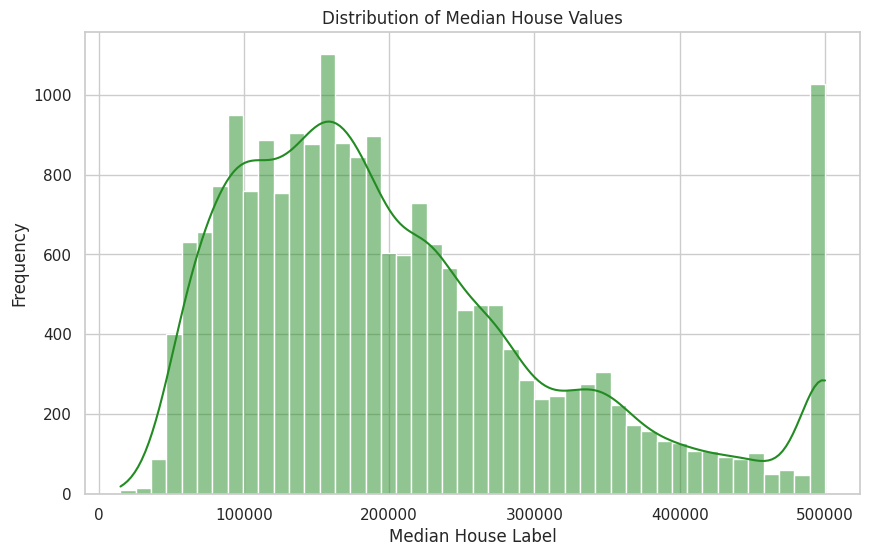

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned["median_house_value"], color="forestgreen", kde=True)
plt.title("Distribution of Median House Values")
plt.xlabel("Median House Label")
plt.ylabel("Frequency")
plt.show()

In [12]:
Q1 = data_cleaned["median_house_value"].quantile(0.25)
print(Q1)
Q3 = data_cleaned["median_house_value"].quantile(0.75)
print(Q3)
IQR = Q3 - Q1

#Bounds for Outliers
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

#Remove Outliers
data_no_outliers_1 = data_cleaned[(data_cleaned["median_house_value"]>=lower_bound) & (data_cleaned["median_house_value"]<=upper_bound)]

#Check the shape of the data before and after the removal of Outliers:
print("Original Data Shape:", data_cleaned.shape)
print("New Data shape without Outliers:", data_no_outliers_1.shape)

119500.0
264700.0
Original Data Shape: (20433, 10)
New Data shape without Outliers: (19369, 10)


**BoxPlot for Removing Outliers**

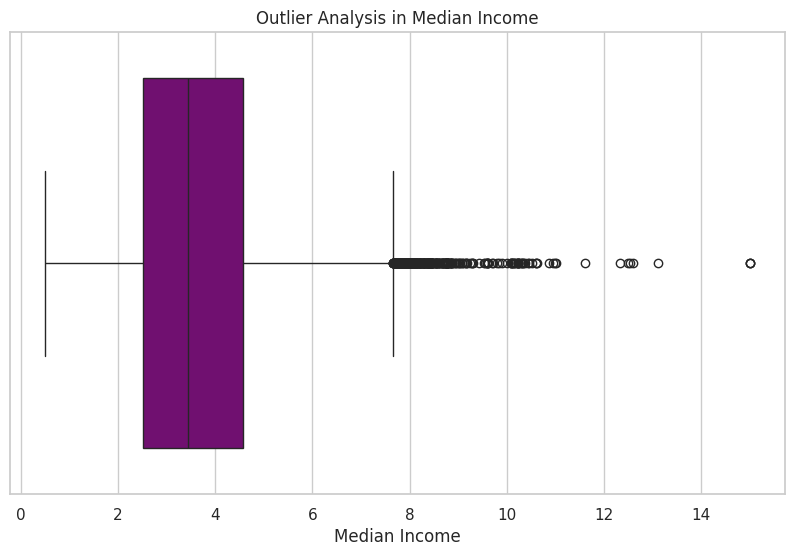

In [13]:
#Outliers in Median Income:
plt.figure(figsize=[10,6])
sns.boxplot(x=data_no_outliers_1["median_income"], color="purple")
plt.title("Outlier Analysis in Median Income")
plt.xlabel("Median Income")
plt.show()

In [14]:
#Calculate Q1 and Q3 on the previous data having no Outliers:
Q1 = data_no_outliers_1["median_income"].quantile(0.25)
Q3 = data_no_outliers_1["median_income"].quantile(0.75)
IQR = Q3 - Q1

#Define bounds for Outliers:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

#Remove Outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1["median_income"] >= lower_bound) & (data_no_outliers_1["median_income"] <= upper_bound)]

#Check the shape of the data before and after the removal of Outliers:
print("Original Data Shape:", data_no_outliers_1.shape)
print("New Data shape without Outliers:", data_no_outliers_2.shape)

Original Data Shape: (19369, 10)
New Data shape without Outliers: (19026, 10)


In [15]:
data = data_no_outliers_2

**Correlation HeatMap**

<ipython-input-16-dc6a3bfe4a08>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="Reds")


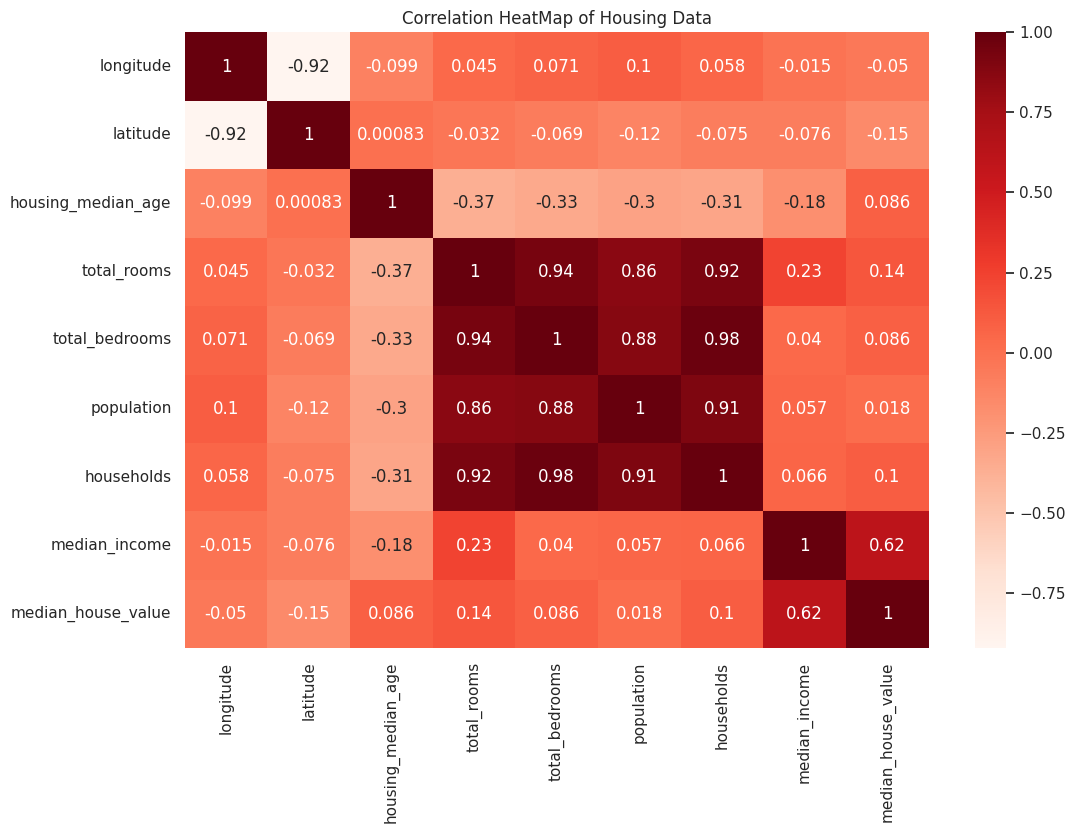

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="Reds")
plt.title("Correlation HeatMap of Housing Data")
plt.show()

In [17]:
data = data.drop("total_bedrooms", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [18]:
# Unique value count for categorical data
for column in ['ocean_proximity']:  # Add other categorical columns if any
    print(f"Unique values in {column}:", data[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


#String Data Categorization to Dummy Variable

In [19]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')
data = pd.concat([data.drop("ocean_proximity", axis =1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [20]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [21]:
data=data.drop("ocean_proximity_ISLAND", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [22]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52,1467,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,565,259,3.8462,342200,0,0,1,0
5,-122.25,37.85,52,919,413,193,4.0368,269700,0,0,1,0
6,-122.25,37.84,52,2535,1094,514,3.6591,299200,0,0,1,0
7,-122.25,37.84,52,3104,1157,647,3.1200,241400,0,0,1,0
8,-122.26,37.84,42,2555,1206,595,2.0804,226700,0,0,1,0
9,-122.25,37.84,52,3549,1551,714,3.6912,261100,0,0,1,0
10,-122.26,37.85,52,2202,910,402,3.2031,281500,0,0,1,0
11,-122.26,37.85,52,3503,1504,734,3.2705,241800,0,0,1,0


In [23]:
#Define your Features (x -> Independent Variable) and Target (y -> Dependent Variable):
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
#Take the target as "median_house_value"
target = ["median_house_value"]

x=data[features]
y=data[target]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1111)

print(f"Training Set Size: {x_train.shape[0]} samples")
print(f"Test Set Size: {x_test.shape[0]} samples")

Training Set Size: 15220 samples
Test Set Size: 3806 samples


# ***Training***

In [24]:
x_train

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,-116.90,33.03,11,3213,1975,579,3.4750,167200,1,0,0,0
1656,-121.93,37.89,13,2085,852,264,7.3445,366700,0,1,0,0
9190,-118.35,34.32,52,102,54,32,1.9875,191700,1,0,0,0
11839,-120.95,39.93,26,2023,922,365,2.8125,83500,0,1,0,0
12267,-116.91,33.75,13,10886,4266,1955,2.3169,123400,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,-117.32,33.25,7,8206,4399,1423,3.6301,170900,1,0,0,0
9608,-120.51,37.29,20,4927,4205,1009,1.7679,79800,0,1,0,0
12606,-121.49,38.50,32,2364,1331,449,3.3190,84500,0,1,0,0
2907,-119.03,35.37,52,1503,554,277,1.6786,126600,0,1,0,0


In [25]:
x_train_const = sm.add_constant(x_train)
x_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1.0,-116.90,33.03,11,3213,1975,579,3.4750,167200,1,0,0,0
1656,1.0,-121.93,37.89,13,2085,852,264,7.3445,366700,0,1,0,0
9190,1.0,-118.35,34.32,52,102,54,32,1.9875,191700,1,0,0,0
11839,1.0,-120.95,39.93,26,2023,922,365,2.8125,83500,0,1,0,0
12267,1.0,-116.91,33.75,13,10886,4266,1955,2.3169,123400,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1.0,-117.32,33.25,7,8206,4399,1423,3.6301,170900,1,0,0,0
9608,1.0,-120.51,37.29,20,4927,4205,1009,1.7679,79800,0,1,0,0
12606,1.0,-121.49,38.50,32,2364,1331,449,3.3190,84500,0,1,0,0
2907,1.0,-119.03,35.37,52,1503,554,277,1.6786,126600,0,1,0,0


In [26]:
#Fit the Ols Model:
model_fitted = sm.OLS(y_train, x_train_const).fit()

#Printing Summary:
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.805e+32
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:45:41   Log-Likelihood:             3.1867e+05
No. Observations:               15220   AIC:                        -6.373e+05
Df Residuals:                   15207   BIC:                        -6.372e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [27]:
#Adding a constant to test predictors:
x_test_const = sm.add_constant(x_test)

#Making Predictions on the Test Set:
test_predictions = model_fitted.predict(x_test_const)
test_predictions

7322     164400.0
465      196400.0
12768     65200.0
2617      73600.0
13351    195100.0
           ...   
11691    217000.0
1454     229200.0
7360     142000.0
19118    200600.0
13084    129500.0
Length: 3806, dtype: float64

#**Checking OLS Assumptions**

**Assumption 1: Linearity**

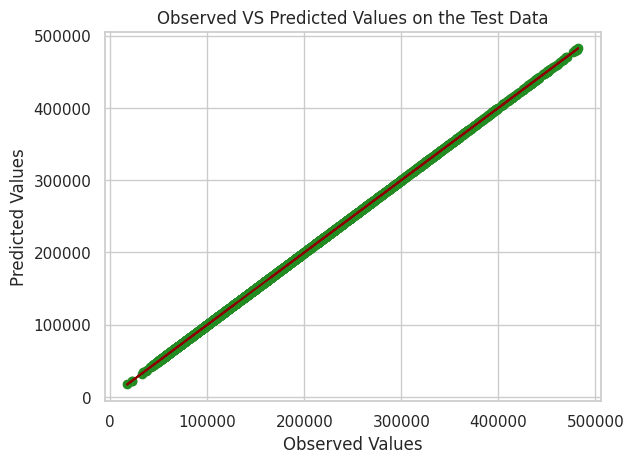

In [28]:
#Scatter Plot for Observed VS Predicted Values on Test Data:

plt.scatter(y_test, test_predictions, color="forestgreen")
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Observed VS Predicted Values on the Test Data")
plt.plot(y_test, y_test,color="darkred")
plt.show()

**Assumption 2: Random Sample**

In [29]:
#Calculate the Mean of the Residuals:
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}")

The mean of the residuals is 0.0


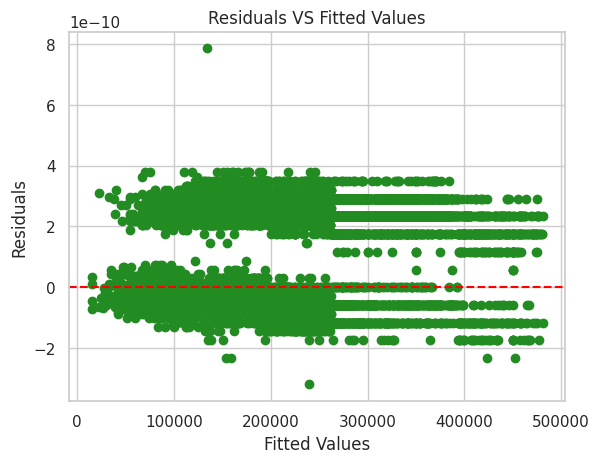

In [30]:
#Plotting the Residuals:
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color="forestgreen")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals VS Fitted Values")
plt.show()

**Assumption 3: Exogeneity**

In [31]:
#Calculate the Residuals:
residuals = model_fitted.resid

#Check for Correlation between Residuals and Predictor:
for column in x_train.columns:
  corr_coefficient = np.corrcoef(x_train[column], residuals)[0, 1]
  print(f"Correlation between residuals and {column}: {np.round(corr_coefficient, 2)}")

Correlation between residuals and longitude: -0.0
Correlation between residuals and latitude: -0.16
Correlation between residuals and housing_median_age: 0.16
Correlation between residuals and total_rooms: -0.02
Correlation between residuals and population: 0.08
Correlation between residuals and households: 0.04
Correlation between residuals and median_income: 0.26
Correlation between residuals and median_house_value: 0.29
Correlation between residuals and ocean_proximity_<1H OCEAN: 0.74
Correlation between residuals and ocean_proximity_INLAND: -0.69
Correlation between residuals and ocean_proximity_NEAR BAY: 0.38
Correlation between residuals and ocean_proximity_NEAR OCEAN: -0.48


**Assumption 4: Homoscedasticity**

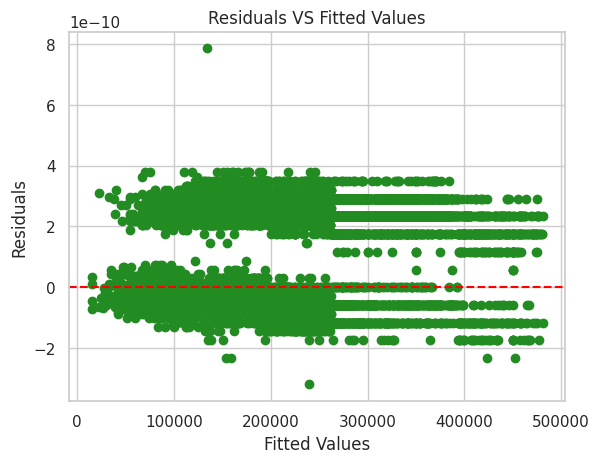

In [32]:
#Plotting the Residuals

plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color="forestgreen")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals VS Fitted Values")
plt.show()

#Train/Test/Evaluation with Sklearn

**Scaling the Data**

In [33]:
from sklearn.preprocessing import StandardScaler
#Initialize the StandardScaler
scaler = StandardScaler()

#Fit the data on the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)

#Apply the same transformation to the test data
x_test_scaled = scaler.transform(x_test)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

#Create and Fit the Model:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

#Make predictions on the scaled test data:
y_pred = lr.predict(x_test_scaled)

#Calculate Mean-Squared_Error and Root-Mean-Squared-Error:
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

#Output the Performance Metrics:
print(f"RMSE on the test set: {rmse}")

RMSE on the test set: 6.442770212234426e-11


In [35]:
print(y_pred)
y_test

[[164400.]
 [196400.]
 [ 65200.]
 ...
 [142000.]
 [200600.]
 [129500.]]


,median_house_value
7322,164400
465,196400
12768,65200
2617,73600
13351,195100
...,...
11691,217000
1454,229200
7360,142000
19118,200600
